## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from IPython.display import Image

Box Plot Observations:
1. Remicane performed better than other drugs based on median value  of  tumor volume.
2. Infubinol was the least effective in reducing tumor size based on median value of tumor vol
3. Infubinol had one outlier (below tumor size below 36.8329049499999)


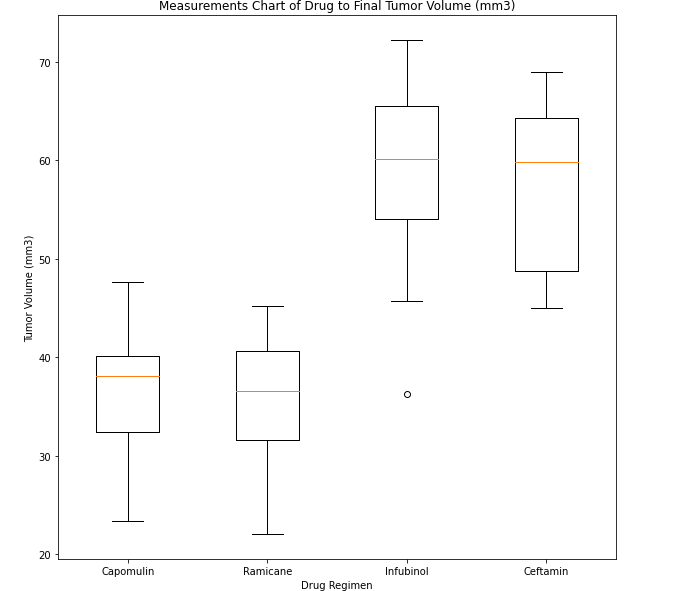

In [2]:

print("Box Plot Observations:")
print("1. Remicane performed better than other drugs based on median value  of  tumor volume.")
print("2. Infubinol was the least effective in reducing tumor size based on median value of tumor vol")
print("3. Infubinol had one outlier (below tumor size below 36.8329049499999)")
      
Image(filename='..\Results\BoxPlot.png',width="400")

Line Chart Observations:
1. As the timepoint increased for Capomulin drug the tumor volume decreased for mouse id: b128
2. At second timepoint = 5 the tumor vol was found to be maximum  45.65133
3. Between the timepoint 30-40 the tumor vol was the lowest )


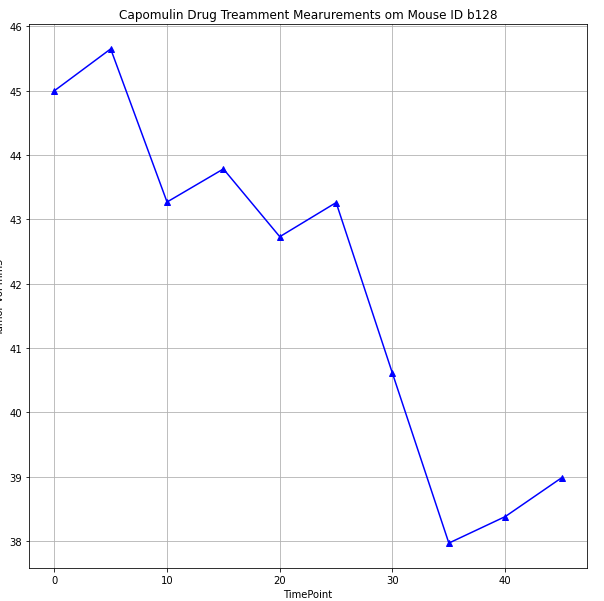

In [3]:

print("Line Chart Observations:")
print("1. As the timepoint increased for Capomulin drug the tumor volume decreased for mouse id: b128")
print("2. At second timepoint = 5 the tumor vol was found to be maximum  45.65133")
print("3. Between the timepoint 30-40 the tumor vol was the lowest )")
      
Image(filename='..\Results\LineChart.png',width="400")

Scatter Plot Observations:
1.For Capomulin drug on mouse id: b128, there is a linear increasing trend  between mouse weight and tumor volume 


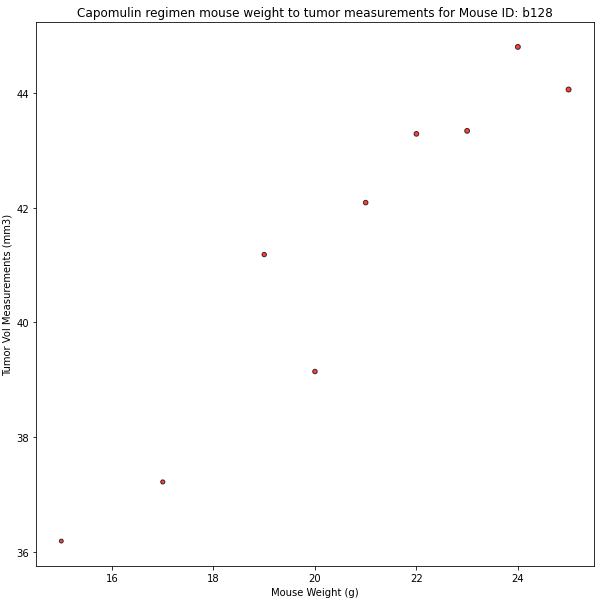

In [4]:
print("Scatter Plot Observations:")
print("1.For Capomulin drug on mouse id: b128, there is a linear increasing trend  between mouse weight and tumor volume ")

Image(filename='..\Results\ScatterPlot.png',width="400")



Linear Regression and correlation Observations:
1. The correlation between both factors is 0.95 which indicates a strong correlation between mouse weight and the tumor size.
2. A linear relationship exists between mouse weight and the avg tumor size
3. R-Squared value of 0.903 confirms the strong correlation )
4. By using the line equation (y = 0.89x + 22.76) we can predict the Avg. tumor vol for the given mouse weight )


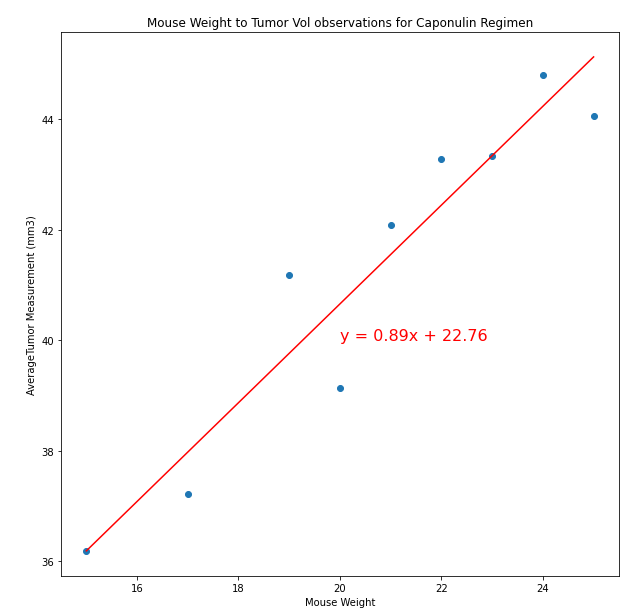

In [5]:
print("Linear Regression and correlation Observations:")

print("1. The correlation between both factors is 0.95 which indicates a strong correlation between mouse weight and the tumor size.")
print("2. A linear relationship exists between mouse weight and the avg tumor size")
print("3. R-Squared value of 0.903 confirms the strong correlation )")
print("4. By using the line equation (y = 0.89x + 22.76) we can predict the Avg. tumor vol for the given mouse weight )")     
Image(filename='..\Results\LinearRegression.png',width="400")

In [6]:


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)

study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
merged_study_data =  mouse_metadata.merge(study_results, on='Mouse ID', how='outer')

# Display the data table for preview
print(merged_study_data)


     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [7]:
# Checking the number of mice.
num_of_mice = merged_study_data['Mouse ID'].value_counts()


#Print no of mice in merged dataframe
print(f"No of mice in the merged DataFrame: {len(num_of_mice)}")

#No of rows and columns in merged Dataframe 
print(f"No of rows and columns  in the merged DataFrame: {merged_study_data.shape}")

No of mice in the merged DataFrame: 249
No of rows and columns  in the merged DataFrame: (1893, 8)


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicateRowsDF = merged_study_data[merged_study_data[['Mouse ID','Timepoint']].duplicated()]
print(duplicateRowsDF[['Mouse ID','Timepoint']])


    Mouse ID  Timepoint
909     g989          0
911     g989          5
913     g989         10
915     g989         15
917     g989         20


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
print(duplicateRowsDF)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#Remove the duplicate rows 
merged_study_data = merged_study_data.sort_values('Mouse ID')
clean_study_data = merged_study_data.drop_duplicates(['Mouse ID','Timepoint'],keep='first')
clean_study_data_df = pd.DataFrame(clean_study_data)


In [11]:
#Again check for duplicates if any
duplicateRows_DF = clean_study_data_df[clean_study_data_df[['Mouse ID','Timepoint']].duplicated()]
print(duplicateRows_DF[['Mouse ID','Timepoint']])

Empty DataFrame
Columns: [Mouse ID, Timepoint]
Index: []


In [12]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_study_data_df['Mouse ID'].value_counts()

#Print no of mice in clean dataframe
print(f"No of mice in the clean DataFrame: {len(num_mice)}")

#No of rows and columns
print(f"No of rows and columns  in the clean DataFrame: {clean_study_data_df.shape}")

No of mice in the clean DataFrame: 249
No of rows and columns  in the clean DataFrame: (1888, 8)


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

grouped_drug_data =  clean_study_data_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = grouped_drug_data['Tumor Volume (mm3)'].mean()
#print(tumor_mean)
tumor_median = grouped_drug_data['Tumor Volume (mm3)'].median()

tumor_variance = grouped_drug_data['Tumor Volume (mm3)'].var()
#print(tumor_variance)
tumor_std = grouped_drug_data['Tumor Volume (mm3)'].std()
#print(tumor_std)
tumor_sem = grouped_drug_data['Tumor Volume (mm3)'].sem()
#print(tumor_sem)


# Assemble the resulting series into a single summary dataframe.
summary_statistics_df = pd.DataFrame({
    'Tumor Mean':tumor_mean,
    'Tumor Median':tumor_median,
    'Tumor Variance': tumor_variance,
    'Tumor Standard':tumor_std,
    'Tumor SEM':tumor_sem
})

print(summary_statistics_df)

              Tumor Mean  Tumor Median  Tumor Variance  Tumor Standard  \
Drug Regimen                                                             
Capomulin      40.675741     41.557809       24.947764        4.994774   
Ceftamin       52.591172     51.776157       39.290177        6.268188   
Infubinol      52.884795     51.820584       43.128684        6.567243   
Ketapril       55.235638     53.698743       68.553577        8.279709   
Naftisol       54.331565     52.509285       66.173479        8.134708   
Placebo        54.033581     52.288934       61.168083        7.821003   
Propriva       52.389178     50.909965       43.116372        6.566306   
Ramicane       40.216745     40.673236       23.486704        4.846308   
Stelasyn       54.233149     52.431737       59.450562        7.710419   
Zoniferol      53.236507     51.818479       48.533355        6.966589   

              Tumor SEM  
Drug Regimen             
Capomulin      0.329346  
Ceftamin       0.469821  
Infubin

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_fun_df =clean_study_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(["mean","median","var","std","sem"]) 
print(agg_fun_df)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.389178  50.909965  43.116372  6.566306  0.525725
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

In [15]:
grouped_regimen = clean_study_data_df.groupby('Drug Regimen')
num_of_measurements = grouped_drug_data['Timepoint'].count()
drug_measurements_df = pd.DataFrame(num_of_measurements)
drug_measurements_df = drug_measurements_df.reset_index()
drug_measurements_df = drug_measurements_df.rename(columns={'Timepoint':'Total Measurements'})
print(drug_measurements_df)

  Drug Regimen  Total Measurements
0    Capomulin                 230
1     Ceftamin                 178
2    Infubinol                 178
3     Ketapril                 188
4     Naftisol                 186
5      Placebo                 181
6     Propriva                 156
7     Ramicane                 228
8     Stelasyn                 181
9    Zoniferol                 182


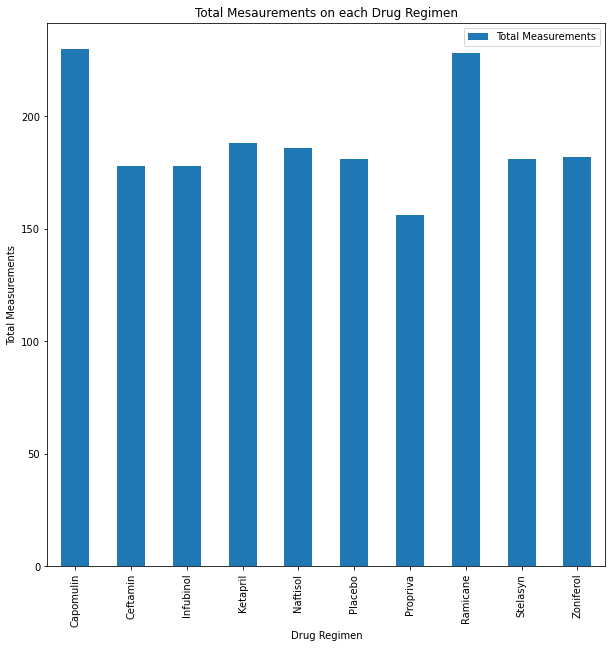

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#plot the chart
drug_measurements_df.plot('Drug Regimen','Total Measurements',kind='bar' ,figsize=(10,10) )
plt.title("Total Mesaurements on each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements")
plt.show()

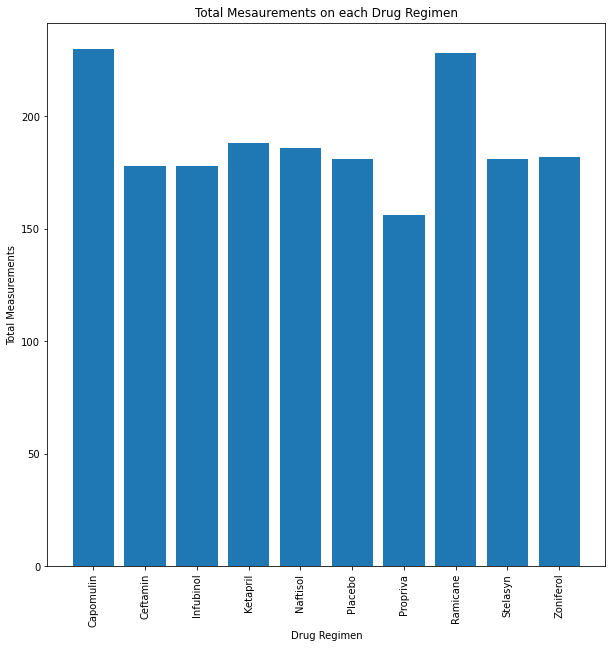

In [17]:
x_values = drug_measurements_df['Drug Regimen']
y_values = drug_measurements_df['Total Measurements']
tick_locations = [value for value in x_values]

plt.figure(figsize=(10,10))
plt.bar(x_values,y_values)
plt.xticks(tick_locations, rotation="vertical")
plt.title("Total Mesaurements on each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements")
plt.show()

In [18]:
#Group by to find the unique number of male vs female
grouped_gender_data = clean_study_data_df.groupby('Sex')

gender_cnt = grouped_gender_data.count()
gender_df = pd.DataFrame(gender_cnt)
gender_df = gender_df.reset_index()
print(gender_df)

      Sex  Mouse ID  Drug Regimen  Age_months  Weight (g)  Timepoint  \
0  Female       930           930         930         930        930   
1    Male       958           958         958         958        958   

   Tumor Volume (mm3)  Metastatic Sites  
0                 930               930  
1                 958               958  


        Total Count  Percentage
Sex                            
Female          930       49.26
Male            958       50.74


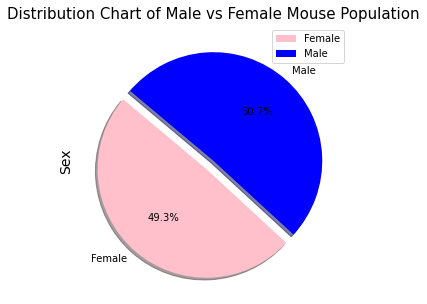

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_gender_data = clean_study_data_df.groupby('Sex')

gender_cnt = grouped_gender_data['Mouse ID'].count()
gender_df = pd.DataFrame(gender_cnt)
gender_df = gender_df.rename(columns={'Mouse ID':'Total Count'})
female_count =gender_cnt['Female']
male_count = gender_cnt['Male']
gender_df['Percentage'] = [round(female_count/(female_count+male_count)*100,2),round(male_count/(female_count+male_count)*100,2)]
print(gender_df)


colors = ['pink', 'blue']
explode = (0.1, 0)
gender_df.plot.pie(y='Total Count', figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")
plt.title('Distribution Chart of Male vs Female Mouse Population',fontsize = 15)
plt.ylabel('Sex',fontsize = 14)

plt.show()

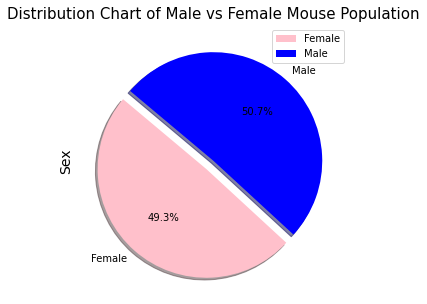

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female','Male']

#Get the values of each section of the pie chart
sizes = gender_df['Percentage']

#Set colors for each section of the pie
colors = ['pink', 'blue']

#Set Explode value
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.figure(figsize=(5,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Distribution Chart of Male vs Female Mouse Population',fontsize = 15)
plt.ylabel('Sex',fontsize = 14)
plt.legend(labels, loc='best')
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
#sort the clean data as per Timepoint
sorted_study_data_df = clean_study_data_df.sort_values(['Timepoint'], ascending=True)

#Get data for the drugs mentioned -Capomulin, Ramicane, Infubinol, Ceftamin
best_drug_df = sorted_study_data_df[sorted_study_data_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

#Get the last tumour Vol as per the Timepoint for a drug
tumor_grouped_last = best_drug_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
drug_tumor_df = pd.DataFrame(tumor_grouped_last)
drug_tumor_df = drug_tumor_df.reset_index()
drug_tumor_df


,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
95,Ramicane,s508,30.276232
96,Ramicane,u196,40.667713
97,Ramicane,w678,43.166373
98,Ramicane,y449,44.183451


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


#Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

#Get data for Capomulin and the tumor volume
capomulin_drug_df = drug_tumor_df[drug_tumor_df['Drug Regimen'].isin(['Capomulin'])]
capomulin_drug_df = capomulin_drug_df.reset_index()
capomulin_tumor_vol = capomulin_drug_df['Tumor Volume (mm3)']
tumor_vol_data.append(capomulin_tumor_vol)

#Get data for Ramicane and the tumor volume
ramicane_drug_df = drug_tumor_df[drug_tumor_df['Drug Regimen'].isin(['Ramicane'])]
ramicane_drug_df = ramicane_drug_df.reset_index()
ramicane_tumor_vol = ramicane_drug_df['Tumor Volume (mm3)']
tumor_vol_data.append(ramicane_tumor_vol)


#Get data for Infubinol and the tumor volume
infubinol_drug_df = drug_tumor_df[drug_tumor_df['Drug Regimen'].isin(['Infubinol'])]
infubinol_drug_df = infubinol_drug_df.reset_index()
infubinol_tumor_vol = infubinol_drug_df['Tumor Volume (mm3)']
tumor_vol_data.append(infubinol_tumor_vol)


#Get data for Ceftamin and the tumor volume
ceftamin_drug_df = drug_tumor_df[drug_tumor_df['Drug Regimen'].isin(['Ceftamin'])]
ceftamin_drug_df = ceftamin_drug_df.reset_index()
ceftamin_tumor_vol = ceftamin_drug_df['Tumor Volume (mm3)']
tumor_vol_data.append(ceftamin_tumor_vol)



In [23]:
combined_data_df = pd.DataFrame({
    'Capomulin': tumor_vol_data[0] ,
    'Ramicane': tumor_vol_data[1] ,
    'Infubinol': tumor_vol_data[2] ,
    'Ceftamin': tumor_vol_data[3] 
})


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
   
# Locate the rows which contain mice on each drug and get the tumor volumes

i = 0
for vol in tumor_vol_data:
    quartiles = vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"--------Data For Drug {treatments[i]}-------------")
    print(f"The lower quartile  is: {lowerq}")
    print(f"The upper quartile  is: {upperq}")
    print(f"The interquartile range  is: {iqr}")
    print(f"The the median  is: {quartiles[0.5]} ")
    
    # add subset 
      
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("\n")
    
    i =i+1
   
    

--------Data For Drug Capomulin-------------
The lower quartile  is: 32.37735684
The upper quartile  is: 40.1592203
The interquartile range  is: 7.781863460000004
The the median  is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


--------Data For Drug Ramicane-------------
The lower quartile  is: 31.56046955
The upper quartile  is: 40.65900627
The interquartile range  is: 9.098536719999998
The the median  is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


--------Data For Drug Infubinol-------------
The lower quartile  is: 54.04860769
The upper quartile  is: 65.52574285
The interquartile range  is: 11.477135160000003
The the median  is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


--------Data For Drug Ceftamin-------------
The lower quartile  is: 48.72207785
The upper quartile  is: 64.2

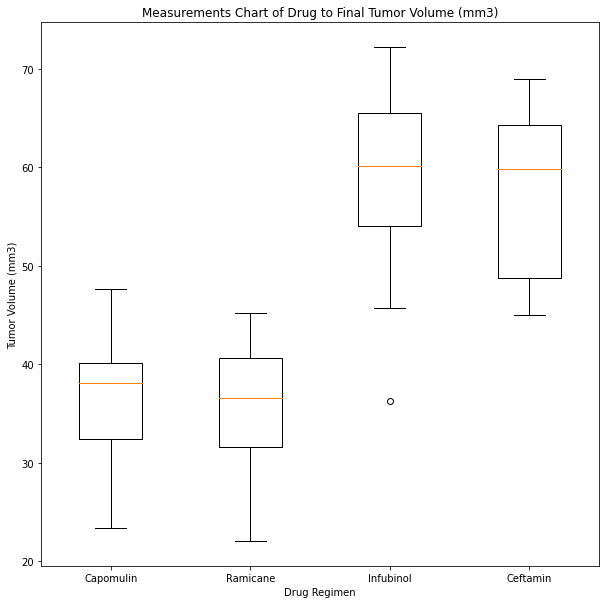

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize =(10,10))
ax1.set_title('Measurements Chart of Drug to Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, labels= treatments)
plt.show()

## Line and Scatter Plots

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
300     b128    Capomulin  Female           9          22          0   
301     b128    Capomulin  Female           9          22          5   
302     b128    Capomulin  Female           9          22         10   
303     b128    Capomulin  Female           9          22         15   
304     b128    Capomulin  Female           9          22         20   
305     b128    Capomulin  Female           9          22         25   
306     b128    Capomulin  Female           9          22         30   
307     b128    Capomulin  Female           9          22         35   
308     b128    Capomulin  Female           9          22         40   
309     b128    Capomulin  Female           9          22         45   

     Tumor Volume (mm3)  Metastatic Sites  
300           45.000000                 0  
301           45.651331                 0  
302           43.270852                 0  
303           43.784893        

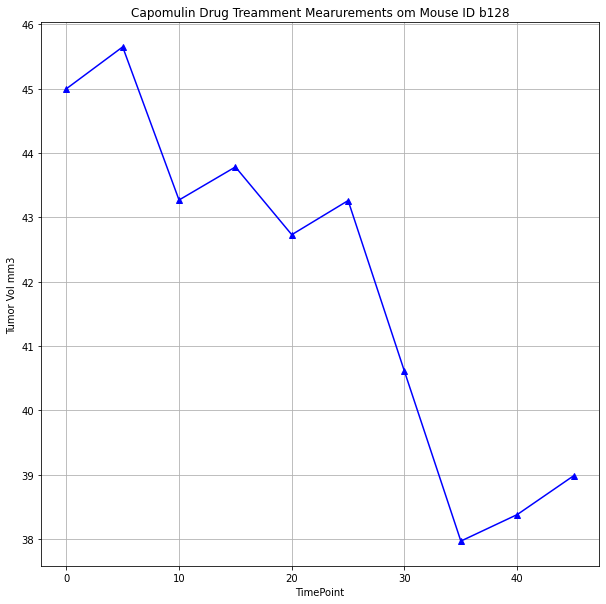

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df =clean_study_data_df.loc[clean_study_data_df['Drug Regimen'] == 'Capomulin']
capomulin_df_b128 =capomulin_df.loc[capomulin_df['Mouse ID']== 'b128']
capomulin_df_b128 = capomulin_df_b128.sort_values(by=['Timepoint'])
x_axis = capomulin_df_b128['Timepoint']
y_axis = capomulin_df_b128['Tumor Volume (mm3)']
print(capomulin_df_b128)
plt.figure(figsize=(10, 10))
plt.plot(x_axis , y_axis, marker='^', color='blue')
plt.xlabel('TimePoint')
plt.ylabel('Tumor Vol mm3')
plt.title(f'Capomulin Drug Treamment Mearurements om Mouse ID b128')
plt.grid()
plt.show()

   Weight (g)  Tumor Volume (mm3)
0          15           36.182040
1          17           37.214133
2          19           41.182391
3          20           39.141053
4          21           42.088700
5          22           43.288490
6          23           43.341051
7          24           44.805810
8          25           44.062109


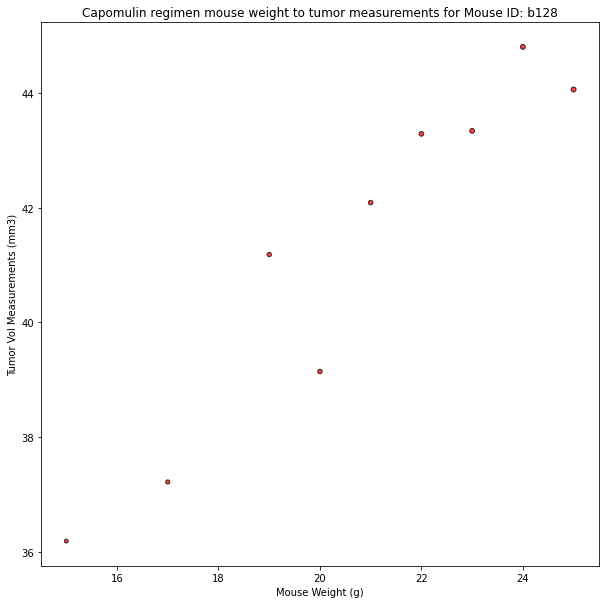

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df =clean_study_data_df.loc[clean_study_data_df['Drug Regimen'] == 'Capomulin']
capomulin_df_b128 =capomulin_df.loc[capomulin_df['Mouse ID']== 'b128']


grouped_mouseweight_data =  capomulin_df.groupby('Weight (g)')

tumor_mean = grouped_mouseweight_data['Tumor Volume (mm3)'].mean()

mouseweight_tumor_df = pd.DataFrame(tumor_mean)
mouseweight_tumor_df = mouseweight_tumor_df.reset_index()
x_axis = mouseweight_tumor_df['Weight (g)' ]
y_axis =  mouseweight_tumor_df['Tumor Volume (mm3)' ]
print(mouseweight_tumor_df)
plt.figure(figsize=(10, 10))
plt.scatter(x_axis,y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title('Capomulin regimen mouse weight to tumor measurements for Mouse ID: b128')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Vol Measurements (mm3)')
plt.show()

## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mouseweight_tumor_df['Weight (g)' ]
y_values =  mouseweight_tumor_df['Tumor Volume (mm3)' ]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")





The correlation between both factors is 0.95


y = 0.89x + 22.76
The r-squared is: 0.9034966277438609


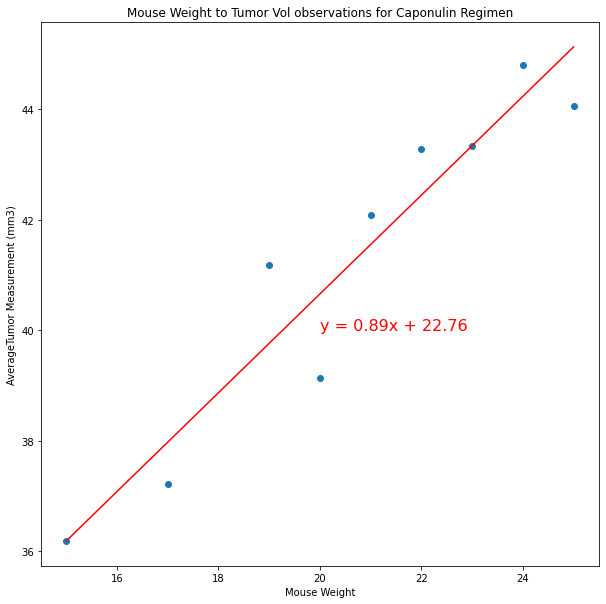

In [28]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10, 10))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
print(line_eq)
plt.annotate(line_eq,(20,40),fontsize=16,color="red")
plt.title('Mouse Weight to Tumor Vol observations for Caponulin Regimen')
plt.xlabel('Mouse Weight')
plt.ylabel('AverageTumor Measurement (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()